# Introduction

This Recommender System recommends similar hostels with an explanation and as a result, such recommendations become more effective and more persuasive.

Since there is no data available for hostels in Ireland on data libraries so I have scrapped the data from Hostel World website for the experiment.

Let's start by importing the necessary libraries.

In [40]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import euclidean_distances
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')

In [41]:
# Loading the dataset
df_hostels = pd.read_csv("../input/explainable.csv", encoding='latin1')

In [42]:
df_hostels.head()

,hotel.id,summary.score,rating.band,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Name,Distance,City,Price
0,0,8.3,Fabulous,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,3 Lakes Hostel,2.5km from city centre,Killarney,14.0
1,1,8.7,Fabulous,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,Abbey Court,0.4km from city centre,Dublin,15.5
2,2,9.1,Superb,9.0,10.0,9.5,9.5,8.5,8.8,8.5,0,0,0,0,0,0,Abbey Court Apartments,0.4km from city centre,Dublin,60.0
3,3,9.7,Superb,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,Abbey View,4.5km from city centre,Galway,30.0
4,4,8.5,Fabulous,8.3,8.9,9.7,8.6,7.9,8.0,8.0,1,0,0,0,0,0,Abigails Hostel,0.5km from city centre,Dublin,12.0


Here for some entertainment features, the values are give as 1 and 0. It means 0 = No and 1 = Yes.

# 1. Exploratory Data Analysis

In [43]:
# General Information
df_hostels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 20 columns):
hotel.id           102 non-null int64
summary.score      102 non-null float64
rating.band        102 non-null object
Value.for.money    102 non-null float64
Security           102 non-null float64
Location           102 non-null float64
Staff              102 non-null float64
Atmosphere         102 non-null float64
Cleanliness        102 non-null float64
Facilities         102 non-null float64
Board.Games        102 non-null int64
Dvds               102 non-null int64
Foosball           102 non-null int64
Games.Room         102 non-null int64
PlayStation        102 non-null int64
Pool.Table         102 non-null int64
Name               102 non-null object
Distance           102 non-null object
City               102 non-null object
Price              102 non-null float64
dtypes: float64(9), int64(7), object(4)
memory usage: 16.1+ KB


In [44]:
# Statistical characteristics of numerical features
df_hostels.describe()

,hotel.id,summary.score,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Price
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.00000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,50.500000,8.666667,8.471569,8.877451,9.115686,9.036275,8.382353,8.57549,8.225490,0.607843,0.401961,0.137255,0.088235,0.039216,0.009804,21.056765
std,29.588849,1.008708,1.375988,0.943546,0.836630,0.954592,1.342851,1.23115,1.396083,0.490642,0.492715,0.345816,0.285037,0.195066,0.099015,10.970926
min,0.000000,5.100000,2.000000,6.000000,4.000000,5.000000,3.000000,5.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,25.250000,8.300000,8.000000,8.400000,8.700000,8.700000,7.900000,8.00000,7.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000
50%,50.500000,8.800000,8.700000,9.100000,9.300000,9.200000,8.500000,8.80000,8.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.500000
75%,75.750000,9.400000,9.400000,9.600000,9.700000,9.700000,9.475000,9.50000,9.200000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24.750000
max,101.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63.000000


Let's draw histograms for some relavent fields

Text(0.5, 1.0, 'summary.score')

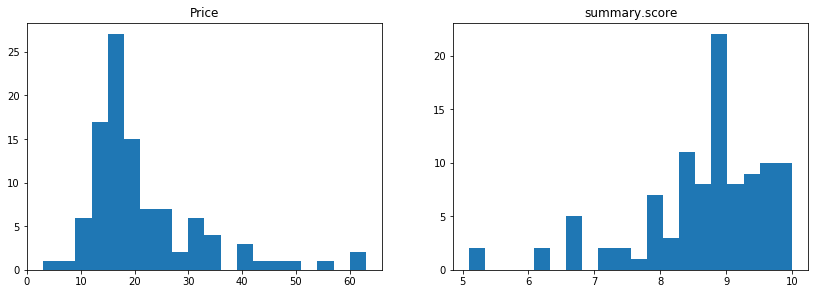

In [45]:
plt.figure(figsize=(14, 10))
plt.subplot(221)
plt.hist(df_hostels['Price'].values, bins=20)
plt.title('Price')
plt.subplot(222)
plt.hist(df_hostels['summary.score'].values, bins=20)
plt.title('summary.score')

Most hostels in the dataset are between 15 to 20 Euros.

# 2. Data Preprocessing

Handling Missing Values

In [46]:
df_hostels.isnull().sum()

hotel.id           0
summary.score      0
rating.band        0
Value.for.money    0
Security           0
Location           0
Staff              0
Atmosphere         0
Cleanliness        0
Facilities         0
Board.Games        0
Dvds               0
Foosball           0
Games.Room         0
PlayStation        0
Pool.Table         0
Name               0
Distance           0
City               0
Price              0
dtype: int64

No missing value are found.

Now, I'm deleting summary.score, Name, and rating.band. Because summary.score is the average value for Value.for.money, Security, Location, Staff, Atmosphere, Cleanliness, and Facilities. And I don't think ranting.band is necessary because they're giving rating based on summary.score i-e if summary.score is between 1 to 3, then rating.band is "Good".

In [47]:
df_hostels.drop(['summary.score', 'Name', 'rating.band'], inplace=True, axis=1);

In [48]:
df_hostels.head()

,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,2.5km from city centre,Killarney,14.0
1,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,0.4km from city centre,Dublin,15.5
2,2,9.0,10.0,9.5,9.5,8.5,8.8,8.5,0,0,0,0,0,0,0.4km from city centre,Dublin,60.0
3,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,4.5km from city centre,Galway,30.0
4,4,8.3,8.9,9.7,8.6,7.9,8.0,8.0,1,0,0,0,0,0,0.5km from city centre,Dublin,12.0


Now, label encoding categorical features like Distance and City.

In [49]:
# Label Encoding
le = LabelEncoder()
df_hostels['Distance'] = le.fit_transform(df_hostels['Distance'])
df_hostels['City'] = le.fit_transform(df_hostels['City'])

df_hostels.head(3)

,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0
1,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5
2,2,9.0,10.0,9.5,9.5,8.5,8.8,8.5,0,0,0,0,0,0,3,4,60.0


In [50]:
def get_hostel_recommendations(df, anchor_id):
    # features used to compute the similarity
    features = ['City']
    
    # create the features - make the anchor be the first row in the dataframe
    df_sorted = df.copy()
    df_sorted = pd.concat([df_sorted[df_sorted['hotel.id'] == anchor_id],df_sorted[df_sorted['hotel.id'] != anchor_id]])
    df_features = df_sorted[features].copy()
    df_features = normalize_features(df_features)
    
    # compute the distances
    X = df_features.values
    Y = df_features.values[0].reshape(1, -1)
    distances = euclidean_distances(X, Y)
    
    df_sorted['similarity_distance'] = distances
    new_df = df_sorted.sort_values('similarity_distance').reset_index(drop=True)
    
    return new_df

def get_city_hostel_recommendations(df, city_id):
    features = ['Distance', 'Value.for.money', 'Security', 'Location', 'Staff', 'Atmosphere', 'Cleanliness', 'Facilities', 'Price', 'Board.Games', 'Dvds', 'Foosball', 'Games.Room', 'PlayStation', 'Pool.Table']
    
    df_sorted = df[df["City"].isin(city_id)]
    df_features = df_sorted[features].copy()
    df_features = normalize_features(df_features)
    
    # compute the distances
    X = df_features.values
    Y = df_features.values[0].reshape(1, -1)
    distances = euclidean_distances(X, Y)
    df_sorted['similarity_distance'] = distances
    return df_sorted.sort_values('similarity_distance').reset_index(drop=True)
    
def normalize_features(df):
    for col in df.columns:
        # fill any NaN's with the mean
        df[col] = df[col].fillna(df[col].mean())
        df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))
    return df

def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

You can see I'm getting recommendations based on features = ['Distance', 'City', 'Value.for.money', 'Security', 'Location', 'Staff', 'Atmosphere', 'Cleanliness', 'Facilities', 'Price', 'Board.Games', 'Dvds', 'Foosball', 'Games.Room', 'PlayStation', 'Pool.Table'].

## Explainable Processing Methods

In [51]:
def processSummary(df):
    tf = (df.values > 8.9)
    if False in tf[:]:
        return False
    else:
        return True
def processEntertainment(df):
    tf = (df.values == 1)
    if False in tf[:]:
        return False
    else:
        return True
def getExplaination(finalShowDown):
    # Summary Fields
    value_for_money = processSummary(finalShowDown['Value.for.money'])
    security = processSummary(finalShowDown['Security'])
    staff = processSummary(finalShowDown['Staff'])
    atmosphere = processSummary(finalShowDown['Atmosphere'])
    clean = processSummary(finalShowDown['Cleanliness'])
    facilities = processSummary(finalShowDown['Facilities'])
    location = processSummary(finalShowDown['Location'])
    
    summary = ""
    finalDecision = "Similar hostels "
    if(value_for_money):
        summary+='Value for money, '
    if(security):
        summary+='Security, '
    if(staff):
        summary+='Staff, '
    if(atmosphere):
        summary+='Atmosphere, '
    if(clean):
        summary+='Cleanliness, '
    if(facilities):
        summary+='Facilities, '
    if(location):
        summary+='Location, '

    if summary != "":
        summary = removeLastOccurence(summary, ",")
        summary_split = summary.split(",")
        if(len(summary_split) > 1):
            summary = removeAgainOccurence(summary, ",")
        finalDecision+="who are famous for excellent "+summary
        
    # Entertainment Fields
    board_games = processEntertainment(finalShowDown['Board.Games'])
    dvd = processEntertainment(finalShowDown['Dvds'])
    foosball = processEntertainment(finalShowDown['Foosball'])
    games_room = processEntertainment(finalShowDown['Games.Room'])
    play_station = processEntertainment(finalShowDown['PlayStation'])
    pool_table = processEntertainment(finalShowDown['Pool.Table'])
    
    entertainment = ""
    if(board_games):
        entertainment+='Board Games, '
    if(dvd):
        entertainment+='DVDs, '
    if(foosball):
        entertainment+='Foosball, '
    if(games_room):
        entertainment+='Games Room, '
    if(play_station):
        entertainment+='PlayStation, '
    if(pool_table):
        entertainment+='Pool Table, '

    if entertainment != "":
        entertainment = removeLastOccurence(entertainment, ",")
        ent_split = entertainment.split(",")
        if(len(ent_split) > 1):
            entertainment = removeAgainOccurence(entertainment, ",")
        if summary != "":
            finalDecision+="and also have "+entertainment+"."
        else:
            finalDecision+="who have "+entertainment+"."
    else:
        finalDecision+="."
    return removeLastOccurence(finalDecision, " ")

def removeLastOccurence(str_val, delimiter):
    k = str_val.rfind(delimiter)
    new_string = str_val[:k] + "" + str_val[k+1:]
    return new_string
def removeAgainOccurence(str_val, delimiter):
    k = str_val.rfind(delimiter)
    new_string = str_val[:k] + " and" + str_val[k+1:]
    return new_string

# Results for all hostel ids using loop

In [52]:
hostel_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
for i in hostel_ids:
    df_recs = get_hostel_recommendations(df_hostels, i)
    df_final = df_recs.head(n=4)
    city = Remove(df_final.City)

    # Now make recommendations for only the data where city is fetched from above
    df_final = get_city_hostel_recommendations(df_hostels, city)

    finalShowDown = df_final.head(n=3)
    print("Test Resuts for hostel.id="+str(i)+"\n")
    display(finalShowDown)
    print(getExplaination(finalShowDown))
    if(i != 100):
        print("\n--------------------------------------\n")

Test Resuts for hostel.id=1



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=2



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=3



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=4



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=5



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=6



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.690693
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.975944


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=7



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=8



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=9



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,9,9.5,9.8,9.3,10.0,9.5,9.8,9.5,1,0,0,0,0,0,39,2,10.0,0.000000
1,27,9.6,9.8,9.8,10.0,9.6,10.0,9.8,0,0,0,0,0,0,38,2,18.0,3.140156
2,72,9.8,9.6,9.9,9.8,9.8,9.7,9.8,1,1,0,0,0,0,44,2,13.5,3.366090


Similar hostels who are famous for excellent Value for money, Security, Staff, Atmosphere, Cleanliness, Facilities and Location.

--------------------------------------

Test Resuts for hostel.id=10



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=11



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,11,3.0,6.0,9.0,5.0,4.0,6.0,4.0,1,0,0,0,0,0,2,0,30.0,8.429370e-08
1,74,7.8,8.3,8.4,8.4,7.4,7.3,7.4,1,0,0,0,0,0,4,0,16.0,5.136595e+00
2,49,8.2,8.4,8.8,8.8,7.8,8.2,8.1,1,0,0,0,0,0,4,0,16.0,5.513488e+00


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=12



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,9,9.5,9.8,9.3,10.0,9.5,9.8,9.5,1,0,0,0,0,0,39,2,10.0,0.000000
1,27,9.6,9.8,9.8,10.0,9.6,10.0,9.8,0,0,0,0,0,0,38,2,18.0,3.140156
2,72,9.8,9.6,9.9,9.8,9.8,9.7,9.8,1,1,0,0,0,0,44,2,13.5,3.366090


Similar hostels who are famous for excellent Value for money, Security, Staff, Atmosphere, Cleanliness, Facilities and Location.

--------------------------------------

Test Resuts for hostel.id=13



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=14



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=15



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,15,9.5,9.1,9.8,10.0,9.6,9.4,9.4,0,0,0,0,0,0,21,8,24.0,0.000000
1,82,9.1,9.6,9.4,8.9,8.6,9.1,9.1,0,0,0,0,0,0,3,8,20.0,2.490620
2,83,10.0,10.0,9.3,10.0,8.0,10.0,10.0,1,1,0,0,0,0,19,8,16.0,4.254006


Similar hostels who are famous for excellent Value for money, Security, Cleanliness, Facilities and Location.

--------------------------------------

Test Resuts for hostel.id=16



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,11,3.0,6.0,9.0,5.0,4.0,6.0,4.0,1,0,0,0,0,0,2,0,30.0,8.429370e-08
1,74,7.8,8.3,8.4,8.4,7.4,7.3,7.4,1,0,0,0,0,0,4,0,16.0,5.136595e+00
2,49,8.2,8.4,8.8,8.8,7.8,8.2,8.1,1,0,0,0,0,0,4,0,16.0,5.513488e+00


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=17



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,11,3.0,6.0,9.0,5.0,4.0,6.0,4.0,1,0,0,0,0,0,2,0,30.0,8.429370e-08
1,74,7.8,8.3,8.4,8.4,7.4,7.3,7.4,1,0,0,0,0,0,4,0,16.0,5.136595e+00
2,49,8.2,8.4,8.8,8.8,7.8,8.2,8.1,1,0,0,0,0,0,4,0,16.0,5.513488e+00


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=18



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=19



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=20



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=21



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=22



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,22,9.6,9.3,8.4,9.8,9.9,9.5,9.5,1,1,1,0,0,0,21,1,14.0,0.000000
1,90,9.4,9.3,9.8,9.7,9.3,9.6,9.2,1,1,0,0,0,0,0,1,17.0,4.638825
2,93,8.8,9.0,9.4,9.6,8.8,8.8,8.0,1,0,0,0,0,0,23,1,18.0,4.757158


Similar hostels who are famous for excellent Security and Staff and also have Board Games.

--------------------------------------

Test Resuts for hostel.id=23



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,22,9.6,9.3,8.4,9.8,9.9,9.5,9.5,1,1,1,0,0,0,21,1,14.0,0.000000
1,90,9.4,9.3,9.8,9.7,9.3,9.6,9.2,1,1,0,0,0,0,0,1,17.0,4.638825
2,93,8.8,9.0,9.4,9.6,8.8,8.8,8.0,1,0,0,0,0,0,23,1,18.0,4.757158


Similar hostels who are famous for excellent Security and Staff and also have Board Games.

--------------------------------------

Test Resuts for hostel.id=24



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,9,9.5,9.8,9.3,10.0,9.5,9.8,9.5,1,0,0,0,0,0,39,2,10.0,0.000000
1,27,9.6,9.8,9.8,10.0,9.6,10.0,9.8,0,0,0,0,0,0,38,2,18.0,3.140156
2,72,9.8,9.6,9.9,9.8,9.8,9.7,9.8,1,1,0,0,0,0,44,2,13.5,3.366090


Similar hostels who are famous for excellent Value for money, Security, Staff, Atmosphere, Cleanliness, Facilities and Location.

--------------------------------------

Test Resuts for hostel.id=25



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.690693
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.975944


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=26



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=27



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,9,9.5,9.8,9.3,10.0,9.5,9.8,9.5,1,0,0,0,0,0,39,2,10.0,0.000000
1,27,9.6,9.8,9.8,10.0,9.6,10.0,9.8,0,0,0,0,0,0,38,2,18.0,3.140156
2,72,9.8,9.6,9.9,9.8,9.8,9.7,9.8,1,1,0,0,0,0,44,2,13.5,3.366090


Similar hostels who are famous for excellent Value for money, Security, Staff, Atmosphere, Cleanliness, Facilities and Location.

--------------------------------------

Test Resuts for hostel.id=28



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=29



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=30



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=31



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=32



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,11,3.0,6.0,9.0,5.0,4.0,6.0,4.0,1,0,0,0,0,0,2,0,30.0,8.429370e-08
1,74,7.8,8.3,8.4,8.4,7.4,7.3,7.4,1,0,0,0,0,0,4,0,16.0,5.136595e+00
2,49,8.2,8.4,8.8,8.8,7.8,8.2,8.1,1,0,0,0,0,0,4,0,16.0,5.513488e+00


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=33



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=34



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,34,8.6,8.9,9.5,9.0,8.3,8.5,8.2,1,0,0,0,0,0,22,9,17.0,0.000000
1,51,8.8,9.1,9.0,8.5,8.3,9.1,8.6,1,1,0,0,0,0,30,9,18.0,3.250828
2,35,9.1,9.7,10.0,9.7,10.0,8.3,7.1,0,0,0,0,0,0,29,9,16.0,4.456822


Similar hostels who are famous for excellent Location.

--------------------------------------

Test Resuts for hostel.id=35



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,34,8.6,8.9,9.5,9.0,8.3,8.5,8.2,1,0,0,0,0,0,22,9,17.0,0.000000
1,51,8.8,9.1,9.0,8.5,8.3,9.1,8.6,1,1,0,0,0,0,30,9,18.0,3.250828
2,35,9.1,9.7,10.0,9.7,10.0,8.3,7.1,0,0,0,0,0,0,29,9,16.0,4.456822


Similar hostels who are famous for excellent Location.

--------------------------------------

Test Resuts for hostel.id=36



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,15,9.5,9.1,9.8,10.0,9.6,9.4,9.4,0,0,0,0,0,0,21,8,24.0,0.000000
1,82,9.1,9.6,9.4,8.9,8.6,9.1,9.1,0,0,0,0,0,0,3,8,20.0,2.490620
2,83,10.0,10.0,9.3,10.0,8.0,10.0,10.0,1,1,0,0,0,0,19,8,16.0,4.254006


Similar hostels who are famous for excellent Value for money, Security, Cleanliness, Facilities and Location.

--------------------------------------

Test Resuts for hostel.id=37



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=38



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=39



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,22,9.6,9.3,8.4,9.8,9.9,9.5,9.5,1,1,1,0,0,0,21,1,14.0,0.000000
1,90,9.4,9.3,9.8,9.7,9.3,9.6,9.2,1,1,0,0,0,0,0,1,17.0,4.638825
2,93,8.8,9.0,9.4,9.6,8.8,8.8,8.0,1,0,0,0,0,0,23,1,18.0,4.757158


Similar hostels who are famous for excellent Security and Staff and also have Board Games.

--------------------------------------

Test Resuts for hostel.id=40



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.123023
2,62,8.8,8.9,9.7,9.4,8.5,8.3,8.2,1,1,0,0,0,0,9,7,14.0,3.986685


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=41



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=42



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=43



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.323595
2,43,9.4,9.1,9.5,9.7,8.6,9.2,8.7,1,0,0,0,0,0,2,6,17.5,4.064104


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=44



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.323595
2,43,9.4,9.1,9.5,9.7,8.6,9.2,8.7,1,0,0,0,0,0,2,6,17.5,4.064104


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=45



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.123023
2,62,8.8,8.9,9.7,9.4,8.5,8.3,8.2,1,1,0,0,0,0,9,7,14.0,3.986685


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=46



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.123023
2,62,8.8,8.9,9.7,9.4,8.5,8.3,8.2,1,1,0,0,0,0,9,7,14.0,3.986685


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=47



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.123023
2,62,8.8,8.9,9.7,9.4,8.5,8.3,8.2,1,1,0,0,0,0,9,7,14.0,3.986685


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=48



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=49



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,11,3.0,6.0,9.0,5.0,4.0,6.0,4.0,1,0,0,0,0,0,2,0,30.0,8.429370e-08
1,74,7.8,8.3,8.4,8.4,7.4,7.3,7.4,1,0,0,0,0,0,4,0,16.0,5.136595e+00
2,49,8.2,8.4,8.8,8.8,7.8,8.2,8.1,1,0,0,0,0,0,4,0,16.0,5.513488e+00


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=50



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=51



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,34,8.6,8.9,9.5,9.0,8.3,8.5,8.2,1,0,0,0,0,0,22,9,17.0,0.000000
1,51,8.8,9.1,9.0,8.5,8.3,9.1,8.6,1,1,0,0,0,0,30,9,18.0,3.250828
2,35,9.1,9.7,10.0,9.7,10.0,8.3,7.1,0,0,0,0,0,0,29,9,16.0,4.456822


Similar hostels who are famous for excellent Location.

--------------------------------------

Test Resuts for hostel.id=52



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=53



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,22,9.6,9.3,8.4,9.8,9.9,9.5,9.5,1,1,1,0,0,0,21,1,14.0,0.000000
1,90,9.4,9.3,9.8,9.7,9.3,9.6,9.2,1,1,0,0,0,0,0,1,17.0,4.638825
2,93,8.8,9.0,9.4,9.6,8.8,8.8,8.0,1,0,0,0,0,0,23,1,18.0,4.757158


Similar hostels who are famous for excellent Security and Staff and also have Board Games.

--------------------------------------

Test Resuts for hostel.id=54



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,34,8.6,8.9,9.5,9.0,8.3,8.5,8.2,1,0,0,0,0,0,22,9,17.0,0.000000
1,51,8.8,9.1,9.0,8.5,8.3,9.1,8.6,1,1,0,0,0,0,30,9,18.0,3.250828
2,35,9.1,9.7,10.0,9.7,10.0,8.3,7.1,0,0,0,0,0,0,29,9,16.0,4.456822


Similar hostels who are famous for excellent Location.

--------------------------------------

Test Resuts for hostel.id=55



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=56



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.323595
2,43,9.4,9.1,9.5,9.7,8.6,9.2,8.7,1,0,0,0,0,0,2,6,17.5,4.064104


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=57



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=58



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=59



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=60



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,22,9.6,9.3,8.4,9.8,9.9,9.5,9.5,1,1,1,0,0,0,21,1,14.0,0.000000
1,90,9.4,9.3,9.8,9.7,9.3,9.6,9.2,1,1,0,0,0,0,0,1,17.0,4.638825
2,93,8.8,9.0,9.4,9.6,8.8,8.8,8.0,1,0,0,0,0,0,23,1,18.0,4.757158


Similar hostels who are famous for excellent Security and Staff and also have Board Games.

--------------------------------------

Test Resuts for hostel.id=61



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=62



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.123023
2,62,8.8,8.9,9.7,9.4,8.5,8.3,8.2,1,1,0,0,0,0,9,7,14.0,3.986685


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=63



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=64



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=65



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=66



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,22,9.6,9.3,8.4,9.8,9.9,9.5,9.5,1,1,1,0,0,0,21,1,14.0,0.000000
1,90,9.4,9.3,9.8,9.7,9.3,9.6,9.2,1,1,0,0,0,0,0,1,17.0,4.638825
2,93,8.8,9.0,9.4,9.6,8.8,8.8,8.0,1,0,0,0,0,0,23,1,18.0,4.757158


Similar hostels who are famous for excellent Security and Staff and also have Board Games.

--------------------------------------

Test Resuts for hostel.id=67



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=68



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.123023
2,62,8.8,8.9,9.7,9.4,8.5,8.3,8.2,1,1,0,0,0,0,9,7,14.0,3.986685


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=69



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=70



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,22,9.6,9.3,8.4,9.8,9.9,9.5,9.5,1,1,1,0,0,0,21,1,14.0,0.000000
1,90,9.4,9.3,9.8,9.7,9.3,9.6,9.2,1,1,0,0,0,0,0,1,17.0,4.638825
2,93,8.8,9.0,9.4,9.6,8.8,8.8,8.0,1,0,0,0,0,0,23,1,18.0,4.757158


Similar hostels who are famous for excellent Security and Staff and also have Board Games.

--------------------------------------

Test Resuts for hostel.id=71



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=72



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,9,9.5,9.8,9.3,10.0,9.5,9.8,9.5,1,0,0,0,0,0,39,2,10.0,0.000000
1,27,9.6,9.8,9.8,10.0,9.6,10.0,9.8,0,0,0,0,0,0,38,2,18.0,3.140156
2,72,9.8,9.6,9.9,9.8,9.8,9.7,9.8,1,1,0,0,0,0,44,2,13.5,3.366090


Similar hostels who are famous for excellent Value for money, Security, Staff, Atmosphere, Cleanliness, Facilities and Location.

--------------------------------------

Test Resuts for hostel.id=73



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=74



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,11,3.0,6.0,9.0,5.0,4.0,6.0,4.0,1,0,0,0,0,0,2,0,30.0,8.429370e-08
1,74,7.8,8.3,8.4,8.4,7.4,7.3,7.4,1,0,0,0,0,0,4,0,16.0,5.136595e+00
2,49,8.2,8.4,8.8,8.8,7.8,8.2,8.1,1,0,0,0,0,0,4,0,16.0,5.513488e+00


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=75



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=76



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=77



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=78



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=79



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=80



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,15,9.5,9.1,9.8,10.0,9.6,9.4,9.4,0,0,0,0,0,0,21,8,24.0,0.000000
1,82,9.1,9.6,9.4,8.9,8.6,9.1,9.1,0,0,0,0,0,0,3,8,20.0,2.490620
2,83,10.0,10.0,9.3,10.0,8.0,10.0,10.0,1,1,0,0,0,0,19,8,16.0,4.254006


Similar hostels who are famous for excellent Value for money, Security, Cleanliness, Facilities and Location.

--------------------------------------

Test Resuts for hostel.id=81



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=82



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,15,9.5,9.1,9.8,10.0,9.6,9.4,9.4,0,0,0,0,0,0,21,8,24.0,0.000000
1,82,9.1,9.6,9.4,8.9,8.6,9.1,9.1,0,0,0,0,0,0,3,8,20.0,2.490620
2,83,10.0,10.0,9.3,10.0,8.0,10.0,10.0,1,1,0,0,0,0,19,8,16.0,4.254006


Similar hostels who are famous for excellent Value for money, Security, Cleanliness, Facilities and Location.

--------------------------------------

Test Resuts for hostel.id=83



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,15,9.5,9.1,9.8,10.0,9.6,9.4,9.4,0,0,0,0,0,0,21,8,24.0,0.000000
1,82,9.1,9.6,9.4,8.9,8.6,9.1,9.1,0,0,0,0,0,0,3,8,20.0,2.490620
2,83,10.0,10.0,9.3,10.0,8.0,10.0,10.0,1,1,0,0,0,0,19,8,16.0,4.254006


Similar hostels who are famous for excellent Value for money, Security, Cleanliness, Facilities and Location.

--------------------------------------

Test Resuts for hostel.id=84



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.123023
2,62,8.8,8.9,9.7,9.4,8.5,8.3,8.2,1,1,0,0,0,0,9,7,14.0,3.986685


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=85



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,9,9.5,9.8,9.3,10.0,9.5,9.8,9.5,1,0,0,0,0,0,39,2,10.0,0.000000
1,27,9.6,9.8,9.8,10.0,9.6,10.0,9.8,0,0,0,0,0,0,38,2,18.0,3.140156
2,72,9.8,9.6,9.9,9.8,9.8,9.7,9.8,1,1,0,0,0,0,44,2,13.5,3.366090


Similar hostels who are famous for excellent Value for money, Security, Staff, Atmosphere, Cleanliness, Facilities and Location.

--------------------------------------

Test Resuts for hostel.id=86



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=87



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,34,8.6,8.9,9.5,9.0,8.3,8.5,8.2,1,0,0,0,0,0,22,9,17.0,0.000000
1,51,8.8,9.1,9.0,8.5,8.3,9.1,8.6,1,1,0,0,0,0,30,9,18.0,3.250828
2,35,9.1,9.7,10.0,9.7,10.0,8.3,7.1,0,0,0,0,0,0,29,9,16.0,4.456822


Similar hostels who are famous for excellent Location.

--------------------------------------

Test Resuts for hostel.id=88



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.123023
2,62,8.8,8.9,9.7,9.4,8.5,8.3,8.2,1,1,0,0,0,0,9,7,14.0,3.986685


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=89



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,22,9.6,9.3,8.4,9.8,9.9,9.5,9.5,1,1,1,0,0,0,21,1,14.0,0.000000
1,90,9.4,9.3,9.8,9.7,9.3,9.6,9.2,1,1,0,0,0,0,0,1,17.0,4.638825
2,93,8.8,9.0,9.4,9.6,8.8,8.8,8.0,1,0,0,0,0,0,23,1,18.0,4.757158


Similar hostels who are famous for excellent Security and Staff and also have Board Games.

--------------------------------------

Test Resuts for hostel.id=90



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,22,9.6,9.3,8.4,9.8,9.9,9.5,9.5,1,1,1,0,0,0,21,1,14.0,0.000000
1,90,9.4,9.3,9.8,9.7,9.3,9.6,9.2,1,1,0,0,0,0,0,1,17.0,4.638825
2,93,8.8,9.0,9.4,9.6,8.8,8.8,8.0,1,0,0,0,0,0,23,1,18.0,4.757158


Similar hostels who are famous for excellent Security and Staff and also have Board Games.

--------------------------------------

Test Resuts for hostel.id=91



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=92



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=93



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,22,9.6,9.3,8.4,9.8,9.9,9.5,9.5,1,1,1,0,0,0,21,1,14.0,0.000000
1,90,9.4,9.3,9.8,9.7,9.3,9.6,9.2,1,1,0,0,0,0,0,1,17.0,4.638825
2,93,8.8,9.0,9.4,9.6,8.8,8.8,8.0,1,0,0,0,0,0,23,1,18.0,4.757158


Similar hostels who are famous for excellent Security and Staff and also have Board Games.

--------------------------------------

Test Resuts for hostel.id=94



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,0,8.7,8.4,7.6,8.8,7.9,8.2,8.6,1,0,0,0,0,0,28,7,14.0,0.000000
1,68,8.5,8.2,9.2,8.7,8.2,7.8,7.8,1,1,0,0,0,0,24,7,10.0,3.123023
2,62,8.8,8.9,9.7,9.4,8.5,8.3,8.2,1,1,0,0,0,0,9,7,14.0,3.986685


Similar hostels who have Board Games.

--------------------------------------

Test Resuts for hostel.id=95



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=96



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=97



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

Test Resuts for hostel.id=98



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=99



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,1,8.4,8.9,9.7,8.9,8.2,8.3,8.3,1,1,1,1,1,1,3,4,15.5,0.000000
1,31,8.6,9.1,8.0,9.4,8.2,9.1,8.8,1,1,1,1,1,0,7,4,18.0,6.531908
2,28,8.4,8.8,8.7,9.1,7.9,8.2,8.1,1,1,1,1,0,0,9,4,15.0,7.783504


Similar hostels who have Board Games, DVDs, Foosball and Games Room.

--------------------------------------

Test Resuts for hostel.id=100



,hotel.id,Value.for.money,Security,Location,Staff,Atmosphere,Cleanliness,Facilities,Board.Games,Dvds,Foosball,Games.Room,PlayStation,Pool.Table,Distance,City,Price,similarity_distance
0,3,10.0,10.0,8.0,10.0,10.0,10.0,10.0,0,0,0,0,0,0,35,5,30.0,0.000000
1,59,9.2,8.9,9.2,9.7,9.4,9.3,8.8,0,0,0,0,0,0,37,5,20.0,3.240749
2,91,9.4,9.8,8.9,9.8,9.6,9.8,9.7,1,0,0,0,0,0,16,5,20.0,3.333302


Similar hostels who are famous for excellent Value for money, Staff, Atmosphere and Cleanliness.

--------------------------------------

